In [1]:
%matplotlib inline
import tellurium as te

In [2]:
# tellurium.loada
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S2 = 10')

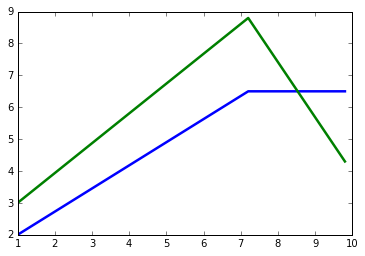

In [3]:
# tellurium.plotArray
import numpy as np
result = np.array([[1,2,3], [7.2,6.5,8.8], [9.8, 6.5, 4.3]])
te.plotArray(result)

In [4]:
# tellurium.loadTestModel
rr = te.loadTestModel('feedback.xml')

AttributeError: 'NoneType' object has no attribute 'getReactionIds'

In [ ]:
# tellurium.getTestModel
# load test model as SBML
sbml = te.getTestModel('feedback.xml')
r = te.loadSBMLModel(sbml)
# simulate
r.simulate(0, 100, 20)

In [ ]:
# tellurium.listTestModels
print(te.listTestModels())

In [ ]:
# tellurium.plot
sbml = te.getTestModel('feedback.xml')
r = te.loadSBMLModel(sbml)
s = r.simulate(0, 100, 201)
r.plot(s, loc="upper right", linewidth=2.0, lineStyle='-', marker='o', markersize=2.0, alpha=0.8, 
       title="Feedback Oscillation", xlabel="time", ylabel="concentration", xlim=[0,100], ylim=[-1, 4])

In [ ]:
# tellurium.gillespie
rr = te.loada ('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
# Simulate from time zero to 40 time units
result = rr.gillespie (0, 40)
# Simulate on a grid with 10 points from start 0 to end time 40
rr.reset()
result = rr.gillespie (0, 40, 10)
# Simulate from time zero to 40 time units using the given selection list
# This means that the first column will be time and the second column species S1
rr.reset()
result = rr.gillespie (0, 40, selections=['time', 'S1'])
# Simulate from time zero to 40 time units, on a grid with 20 points
# using the give selection list
rr.reset()
result = rr.gillespie (0, 40, 20, ['time', 'S1'])
rr.plot(result)

In [ ]:
# tellurium.notebooks.species_search
import bioservices
s = bioservices.BioModels()
ch = bioservices.ChEBI()
results = ch.getLiteEntity("D-glucose 6-sulfate")[0:5]
print(results)
print(type(results[0]))
print(results[0].chebiId)

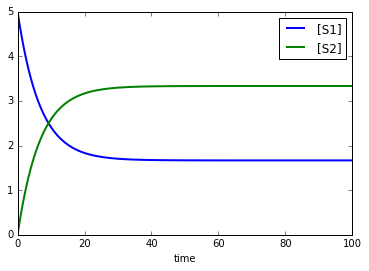

In [5]:
# tellurium.notebooks.parameter_slider
%matplotlib inline
import tellurium as te
from tellurium.notebooks import ParameterSlider

model = '''
      model pathway()
        S1 -> S2; k1*S1 - k2*S2 # Reversible term added here

        # Initialize values
        S1 = 5; S2 = 0;
        k1 = 0.1;  k2 = 0.05;

      end
'''
r = te.loadAntimonyModel(model)
ParameterSlider(r)

In [ ]:
# tellurium.tests.te_passes_tests
import tellurium.tests.test_runner as tetest
runner = tetest.TestRunner()
runner.te_passes_tests()